In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [85]:
# read dataset 
df = pd.read_csv('dataset_pov.csv')

In [87]:
df.head()

,Name,Age,Education,Employment,Income,Poverty Level
0,Terry Hull,80,Secondary,Unemployed,1371,Below Poverty Line
1,Jeremy Johnson,77,No Education,Self-employed,236293,Above Poverty Line
2,Craig Gordon,52,Secondary,Self-employed,148780,Above Poverty Line
3,Renee Jackson,74,No Education,Unemployed,11236,Middle Class
4,Rebecca Gutierrez,85,Primary,Self-employed,526674,Above Poverty Line


In [89]:
# Preprocessing
# Dropping non-numeric and non-relevant columns
df.drop(['Name'], axis=1, inplace=True)

# Columns to encode
categorical_columns = ['Education', 'Employment', 'Poverty Level']

# Dictionary to store the encoders
label_encoders = {}

# Fitting LabelEncoders for each categorical column
for column in categorical_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    label_encoders[column] = encoder


# Feature Scaling
scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

In [91]:
# Splitting the dataset into features and target
X = df.drop('Poverty Level', axis=1)
y = df['Poverty Level']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=7, max_depth=2, random_state=7),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=7, learning_rate=0.07, max_depth=1, random_state=7),
    "AdaBoost": AdaBoostClassifier(n_estimators=7, learning_rate=0.5, random_state=7)
}



Logistic Regression Results
Cross-Validation Accuracy: 0.82 (+/- 0.03)
Test Accuracy Score: 0.8216666666666667
Confusion Matrix:
 [[349   0   4]
 [  0  85  29]
 [  3  71  59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       353
           1       0.54      0.75      0.63       114
           2       0.64      0.44      0.52       133

    accuracy                           0.82       600
   macro avg       0.73      0.73      0.71       600
weighted avg       0.83      0.82      0.82       600



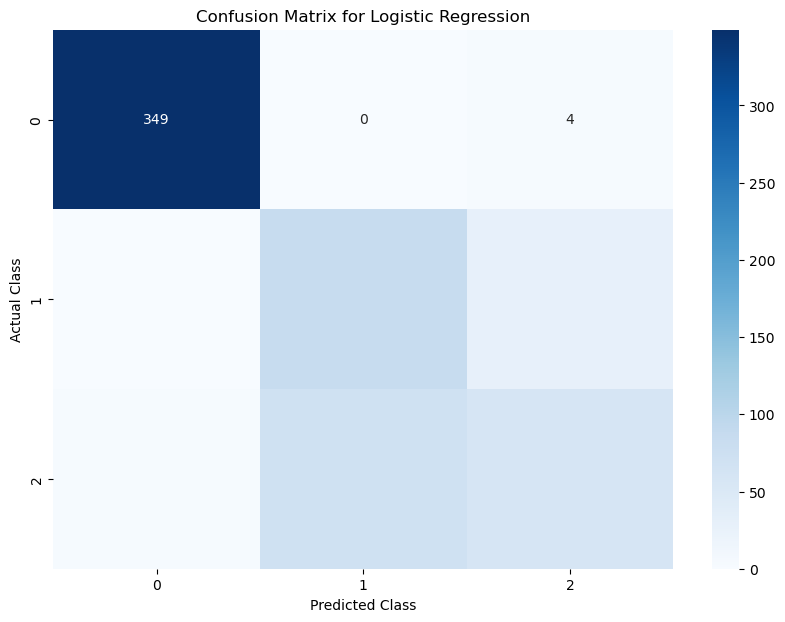


Random Forest Results
Cross-Validation Accuracy: 1.00 (+/- 0.00)
Test Accuracy Score: 1.0
Confusion Matrix:
 [[353   0   0]
 [  0 114   0]
 [  0   0 133]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       133

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



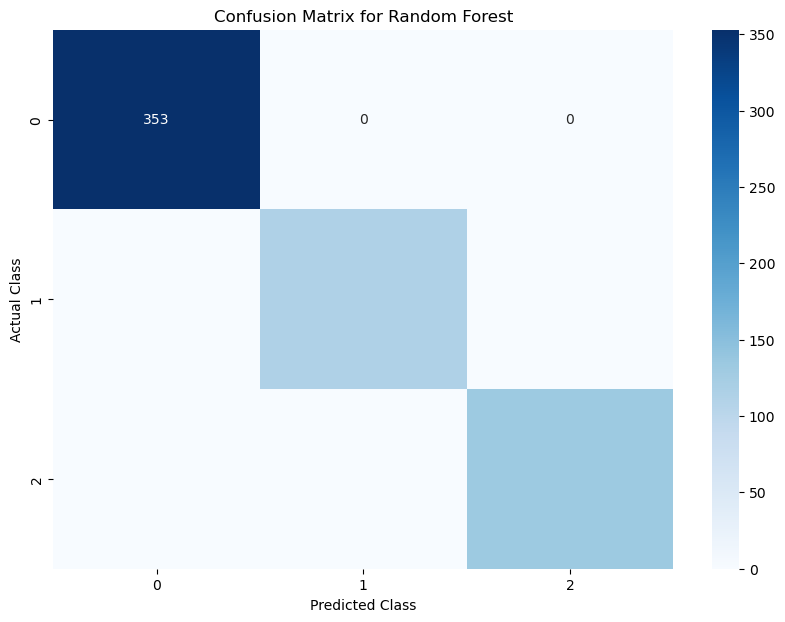


Gradient Boosting Results
Cross-Validation Accuracy: 1.00 (+/- 0.00)
Test Accuracy Score: 1.0
Confusion Matrix:
 [[353   0   0]
 [  0 114   0]
 [  0   0 133]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       133

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



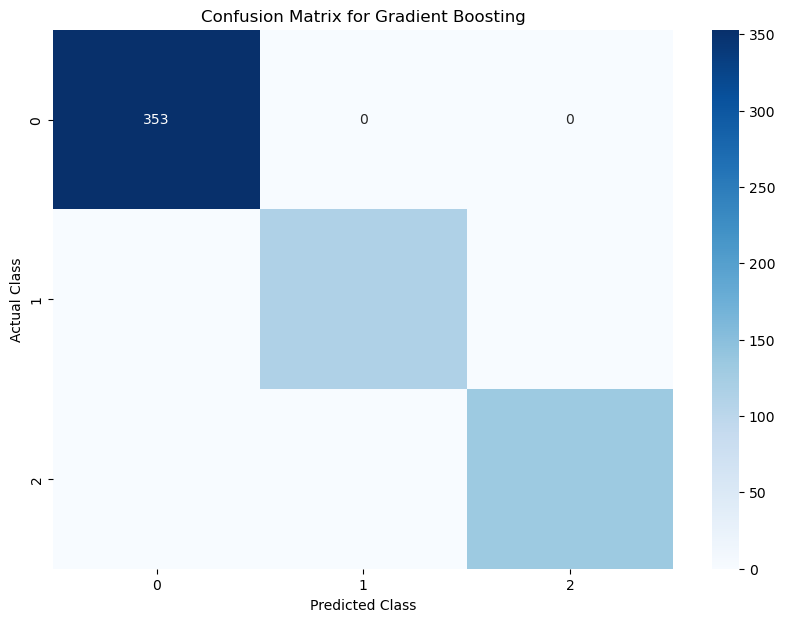


AdaBoost Results
Cross-Validation Accuracy: 1.00 (+/- 0.00)
Test Accuracy Score: 1.0
Confusion Matrix:
 [[353   0   0]
 [  0 114   0]
 [  0   0 133]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       133

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



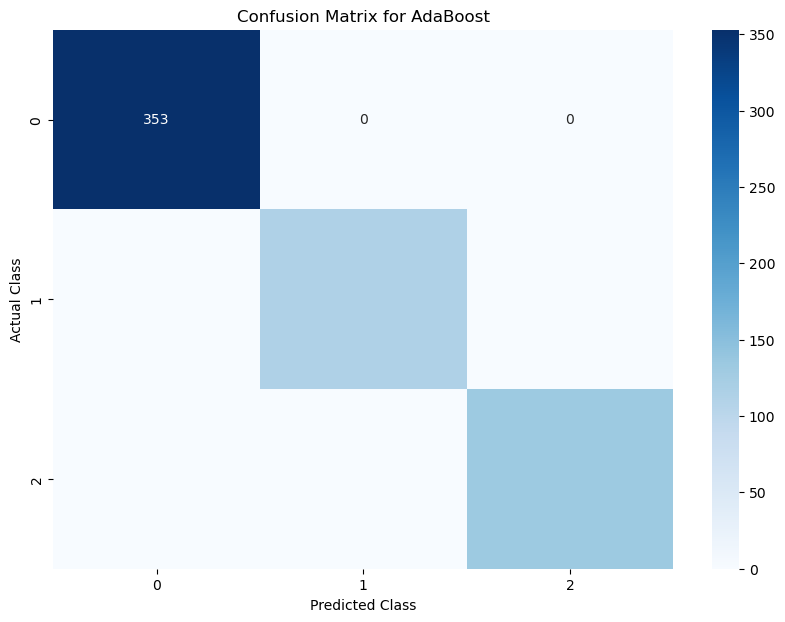

In [95]:
# Training and evaluation
for name, model in models.items():
    # Perform cross-validation to get a more robust estimate of accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print model results
    print(f"\n{name} Results")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
    print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
    
    # Display confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Classification report for precision, recall, and F1-score
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()


In [96]:
# Save the trained models
with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

# Save the scaler and encoder
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the encoders to a file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [ ]:
import pickle

# Save models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=1, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=10, learning_rate=0.5, random_state=42)
}
# Train models and save
for name, model in models.items():
    model.fit(X_train, y_train)

with open('model.pkl', 'wb') as f:
    pickle.dump(models, f)

# Save scaler and encoder
scaler = StandardScaler()
scaler.fit(df[['Age', 'Income']])
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Employment'] = encoder.fit_transform(df['Employment'])
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Poverty Prediction</title>
</head>
<body>
    <h1>Poverty Level Prediction</h1>
    <form id="prediction-form">
        <label for="age">Age:</label>
        <input type="number" id="age" name="age" required>
        <br>
        <label for="education">Education:</label>
        <select id="education" name="education" required>
            <option value="No Education">No Education</option>
            <option value="Primary">Primary</option>
            <option value="Secondary">Secondary</option>
            <option value="Tertiary">Tertiary</option>
        </select>
        <br>
        <label for="employment">Employment Status:</label>
        <select id="employment" name="employment" required>
            <option value="Employed">Employed</option>
            <option value="Unemployed">Unemployed</option>
            <option value="Self-employed">Self-employed</option>
        </select>
        <br>
        <label for="income">Income:</label>
        <input type="number" id="income" name="income" required>
        <br>
        <button type="button" onclick="submitForm()">Submit</button>
    </form>
    <h2>Predictions:</h2>
    <div id="results"></div>

    <script>
        async function submitForm() {
            const formData = {
                age: document.getElementById('age').value,
                education: document.getElementById('education').value,
                employment: document.getElementById('employment').value,
                income: document.getElementById('income').value
            };
            
            const response = await fetch('/predict', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json'
                },
                body: JSON.stringify(formData)
            });
            
            const predictions = await response.json();
            const resultsDiv = document.getElementById('results');
            resultsDiv.innerHTML = '';
            for (const [model, prediction] of Object.entries(predictions)) {
                resultsDiv.innerHTML += `<p><strong>${model}:</strong> ${prediction}</p>`;
            }
        }
    </script>
</body>
</html>
